In [1]:
import pandas as pd



In [2]:
import numpy as np
import matplotlib.pyplot  as plt

In [3]:
df=pd.read_csv('../data/highly_relevant_posts_descending_threshold_50.csv')

In [4]:
df.drop(['subreddit','created_utc','over_18'], axis=1)

,title,selftext,date_created,combined_text,processed_text,relevance_probability
0,"Informal survey: What (legal) drugs, if any, '...","hi! so i'm officially diagnosed, tried dbt but...",2020-10-17 16:53:14,"Informal survey: What (legal) drugs, if any, '...",informal survey legal drug worked hi im offici...,1.000000
1,What combination of meds finally worked for yo...,right now i’m on:\nprozac 40mg\nwellbutrin xl ...,2020-06-25 14:47:27,What combination of meds finally worked for yo...,combination med finally worked hasn’t worked r...,1.000000
2,Does anyone have any experience(s) with any an...,"i abused benzodiazepines, so i cannot trust my...",2015-10-12 02:36:25,Does anyone have any experience(s) with any an...,anyone experience anxiolytic medicine besides ...,1.000000
3,My experience with lamictal/lamotrigine,this is going to be a very long post because i...,2021-08-12 14:13:55,My experience with lamictal/lamotrigine this i...,experience lamictallamotrigine going long post...,1.000000
4,How did antidepressants modify your behavior a...,"hello, i'd like to know :\n\n1) if you've been...",2020-01-31 18:47:16,How did antidepressants modify your behavior a...,antidepressant modify behavior cognition hello...,1.000000
...,...,...,...,...,...,...
2551,Meds seem to not be working.,i keep adding another flare but when i post an...,2021-09-13 22:10:20,Meds seem to not be working. i keep adding ano...,med seem working keep adding another flare pos...,0.500361
2552,Do you ever feel like your medication is actua...,i've been on lamotrigine for 7 months now. i w...,2020-05-08 03:11:07,Do you ever feel like your medication is actua...,ever feel like medication actually making feel...,0.500314
2553,Meds question,hi i was just wondering is anyone on mood stab...,2019-01-14 13:16:56,Meds question hi i was just wondering is anyon...,med question hi wondering anyone mood stabiliz...,0.500182
2554,"I feel much happier, but also far more depress...",i started dating my first boyfriend a couple m...,2021-01-08 05:41:46,"I feel much happier, but also far more depress...",feel much happier also far depressed boyfriend...,0.500148


In [5]:
from drug_named_entity_recognition import find_drugs

[({'name': 'Acetaminophen', 'synonyms': {'Ofirmev', 'Acetaco', 'Acephen', 'Datril', 'Tylenol', 'Panadol', 'Acetaminophen', 'Actamin', 'Acenol', 'Hydroxyacetanilide', 'Acamol', 'Acetamidophenol', 'Paracetamolum', 'Paracetamol', 'Algotropyl', 'Acetominophen'}, 'medline_plus_id': 'a621016', 'generic_names': ['Acetaminophen'], 'mesh_id': 'D058633', 'drugbank_id': 'DB00316', 'wikipedia_url': 'https://en.wikipedia.org/wiki/Paracetamol'}, 2, 2)]


In [6]:
def get_drug_list(text):
    drug_tuples = find_drugs(text.split(" "), is_ignore_case=True)
    drug_names = [drug[0] for drug in drug_tuples]
    drug_list= [drug.get('name') for drug in drug_names]
    unique_drug_list = sorted(set(drug_list))
    return unique_drug_list

In [7]:
df['drug_list'] =df['processed_text'].apply(get_drug_list)

In [8]:
from collections import defaultdict


def build_medication_index(df, column_name):
    med_index = defaultdict(list)
    for idx, row in df.iterrows():
        for med in row[column_name]:
            med_index[med].append(idx)
    return med_index

def find_medication_with_index(med_index, df, medication_name):
    if medication_name in med_index:
        matching_indices = med_index[medication_name]
        return df.loc[matching_indices]
    else:
        return pd.DataFrame()  # Return empty DataFrame if medication not found

# Build the index
med_index = build_medication_index(df, 'drug_list')

# Call the function with a specific medication name
medication_name = 'Lamotrigine'
result = find_medication_with_index(med_index, df, medication_name)
print(result)


                                                  title  \
0     Informal survey: What (legal) drugs, if any, '...   
3               My experience with lamictal/lamotrigine   
8     What medication(s) work best for when you have...   
12    My first time Inpatient: how I learned to advo...   
14    Tomorrow I am seeing my doctor pertaining to m...   
...                                                 ...   
2494                 Lamictal experiences/side effects?   
2495                                    Lamictal Online   
2544                          Paranoia is getting worse   
2545           TW - have i took enough to cause damage?   
2552  Do you ever feel like your medication is actua...   

                                               selftext  created_utc  over_18  \
0     hi! so i'm officially diagnosed, tried dbt but...   1602953594    False   
3     this is going to be a very long post because i...   1628777635    False   
8     i am formally diagnosed with severe genera

In [9]:
def get_synonyms(medication):
    drug_tuples = find_drugs(medication.split(" "), is_ignore_case=True)
    drug_names = [drug[0] for drug in drug_tuples]
    drug_list= [drug.get('synonyms') for drug in drug_names]
    return drug_list

In [10]:
def synonym_list_string(medication):
    return str(get_synonyms(medication_name)).strip('[,],{,}')

#### Generating images

In [33]:
# pip install nx

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for nx from https://files.pythonhosted.org/packages/2b/9f/d0050126808abc0779a3ddbffd864756ec11969d408bc8b0da1d993cb098/nx-0.0.0-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


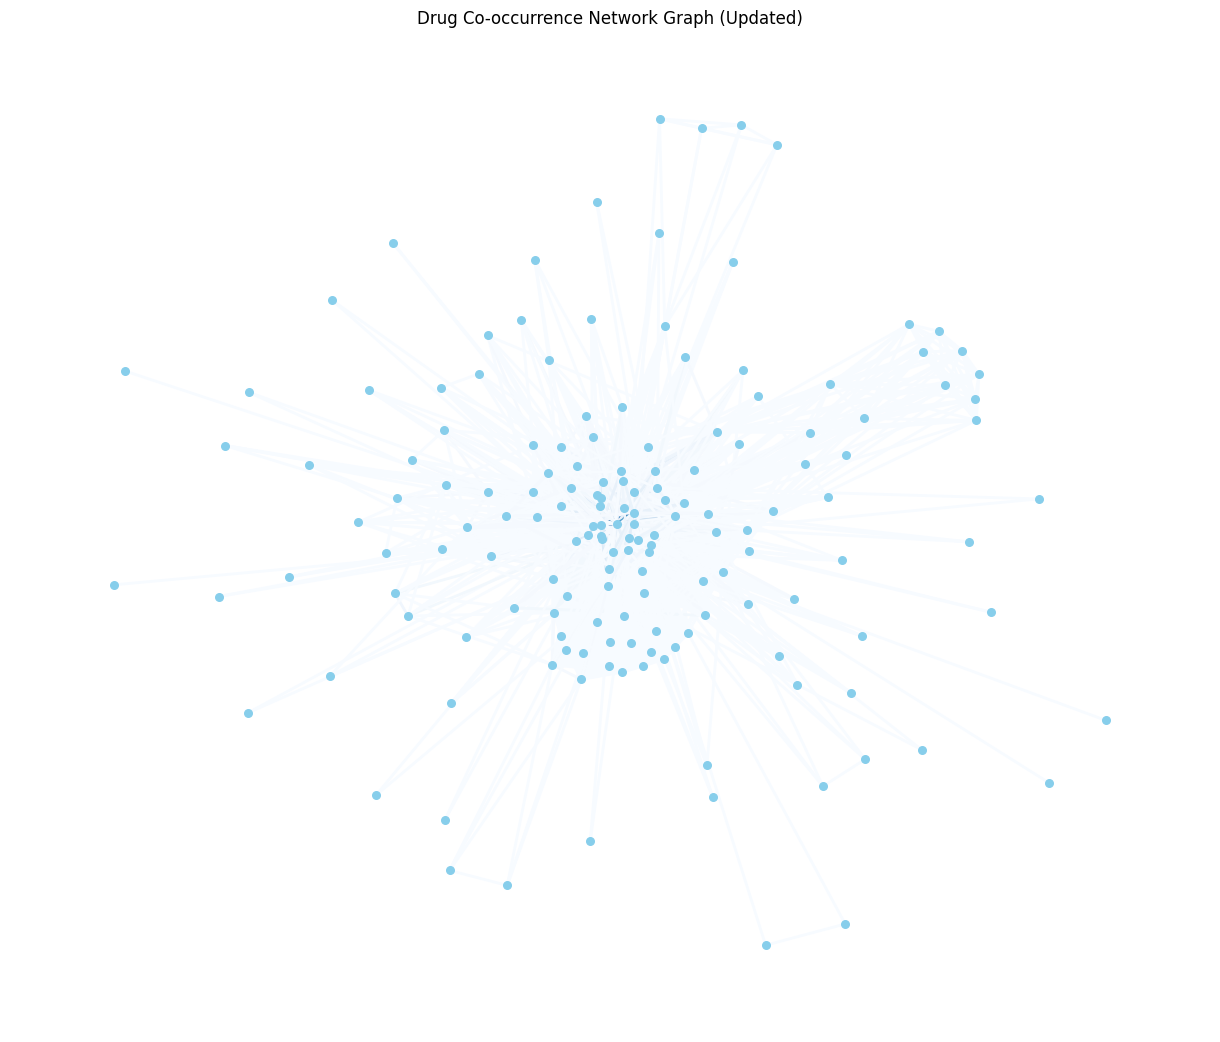

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations


# Function to create a co-occurrence matrix
def create_cooccurrence_matrix(df, drug_col):
    # Get the list of all unique drugs
    all_drugs = set(sum(df[drug_col], []))
    drug_list = sorted(list(all_drugs))

    # Initialize a co-occurrence matrix
    cooccurrence_matrix = pd.DataFrame(0, index=drug_list, columns=drug_list, dtype=int)

    # Count co-occurrences
    for drugs in df[drug_col]:
        for drug1, drug2 in combinations(drugs, 2):
            cooccurrence_matrix.at[drug1, drug2] += 1
            cooccurrence_matrix.at[drug2, drug1] += 1

    return cooccurrence_matrix

# Create the co-occurrence matrix
cooccurrence_matrix = create_cooccurrence_matrix(df, 'drug_list')

# List of medications to drop
medications_to_drop = ['Aspirin','Chlorpromazine','Esketamine']

# Remove the specified medications from the co-occurrence matrix
cooccurrence_matrix.drop(index=medications_to_drop, columns=medications_to_drop, inplace=True)

# Create a graph from the updated co-occurrence matrix
G = nx.Graph()
for drug in cooccurrence_matrix.columns:
    G.add_node(drug)

for drug1, drug2 in combinations(cooccurrence_matrix.columns, 2):
    weight = cooccurrence_matrix.at[drug1, drug2]
    if weight > 0:
        G.add_edge(drug1, drug2, weight=weight)

# Draw the updated graph with a spring layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, weight='weight')  # Positions nodes using a force-directed algorithm
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

nx.draw(G, pos, with_labels=False, node_size=30, node_color="skyblue", font_size=15, font_color="black", edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
plt.title('Drug Co-occurrence Network Graph (Updated)')
plt.show()


The following graph was actually the first that I created. It looks really bad because there are three medications which are basically completely removed from the others (only mentioned once). I fixed this by taking those out

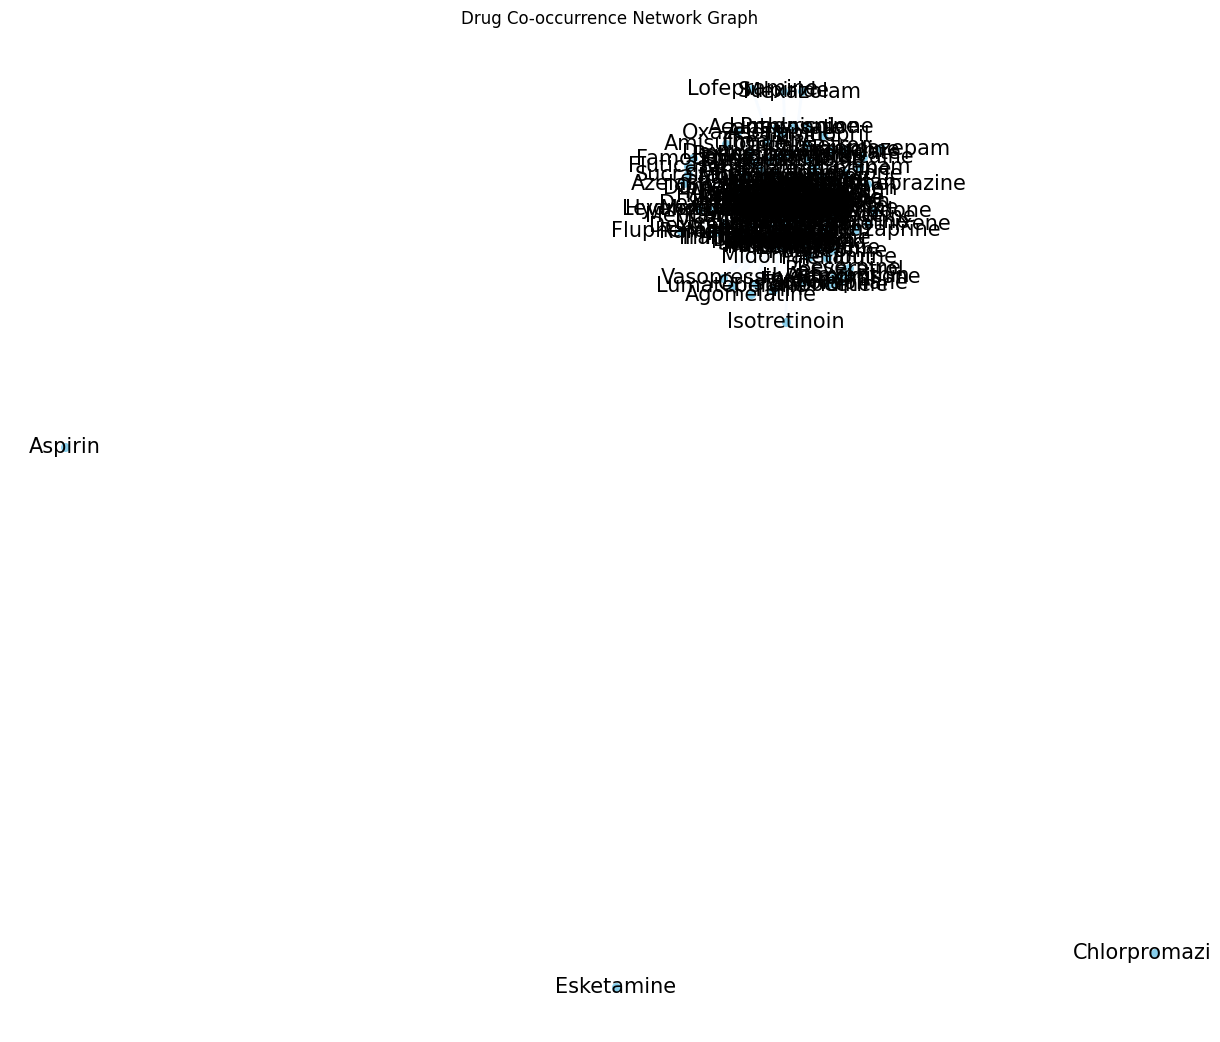

In [38]:
# Draw the graph with a spring layout
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, weight='weight')  # Positions nodes using a force-directed algorithm
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

nx.draw(G, pos, with_labels=True, node_size=30, node_color="skyblue", font_size=15, font_color="black", edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
plt.title('Drug Co-occurrence Network Graph')
plt.show()

In [43]:
import matplotlib.cm as cm

/Users/gkhan/Library/Python/3.12/lib/python/site-packages/networkx/drawing/nx_pylab.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


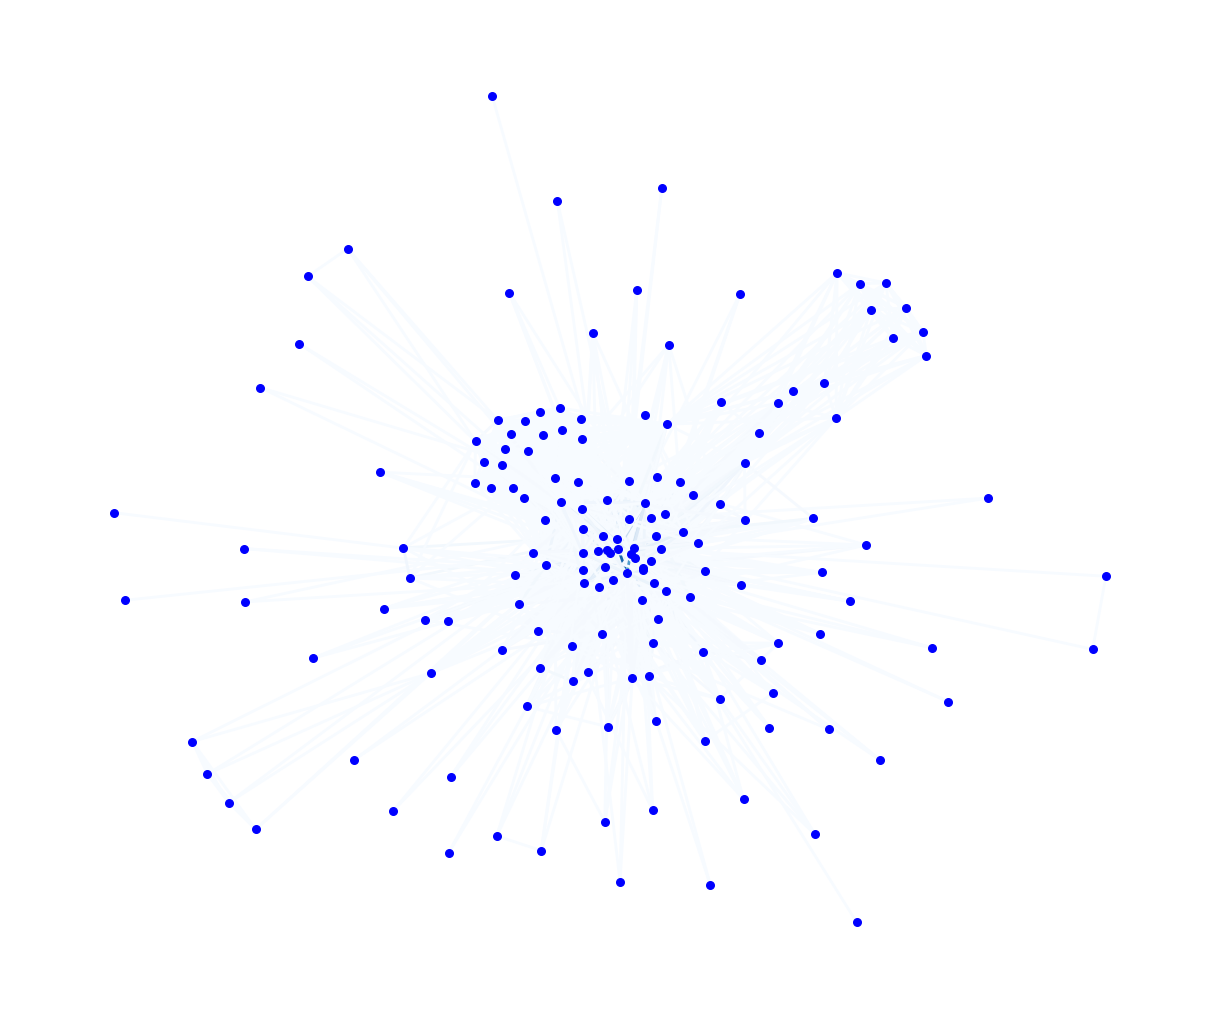

In [27]:
# Calculate the frequency of each drug's appearance in the rows
drug_frequencies = df['drug_list'].explode().value_counts()

# Normalize the frequencies for color intensity (between 0 and 1)
normalized_frequencies = drug_frequencies / drug_frequencies.max()

# Create a graph from the updated co-occurrence matrix
G = nx.Graph()
for drug in cooccurrence_matrix.columns:
    G.add_node(drug, frequency=normalized_frequencies[drug])

for drug1, drug2 in combinations(cooccurrence_matrix.columns, 2):
    weight = cooccurrence_matrix.at[drug1, drug2]
    if weight > 0:
        G.add_edge(drug1, drug2, weight=weight)

# Draw the updated graph with a spring layout and transparency based on frequency
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, weight='weight',seed=42)  # Positions nodes using a force-directed algorithm
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Set a fixed color (blue) and adjust alpha based on frequency
fixed_color = (0, 0, 1, 1)  # Blue color with full alpha
node_colors = [(fixed_color[0], fixed_color[1], fixed_color[2], G.nodes[node]['frequency']) for node in G.nodes]

nx.draw(G, pos, with_labels=False, node_size=30, node_color=(0,0,1,1), font_size=6, font_color="black", edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
#plt.title('Drug Co-occurrence Network Graph (Updated with Alpha Based on Frequency)')
plt.savefig('drug_network_unlabelled.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

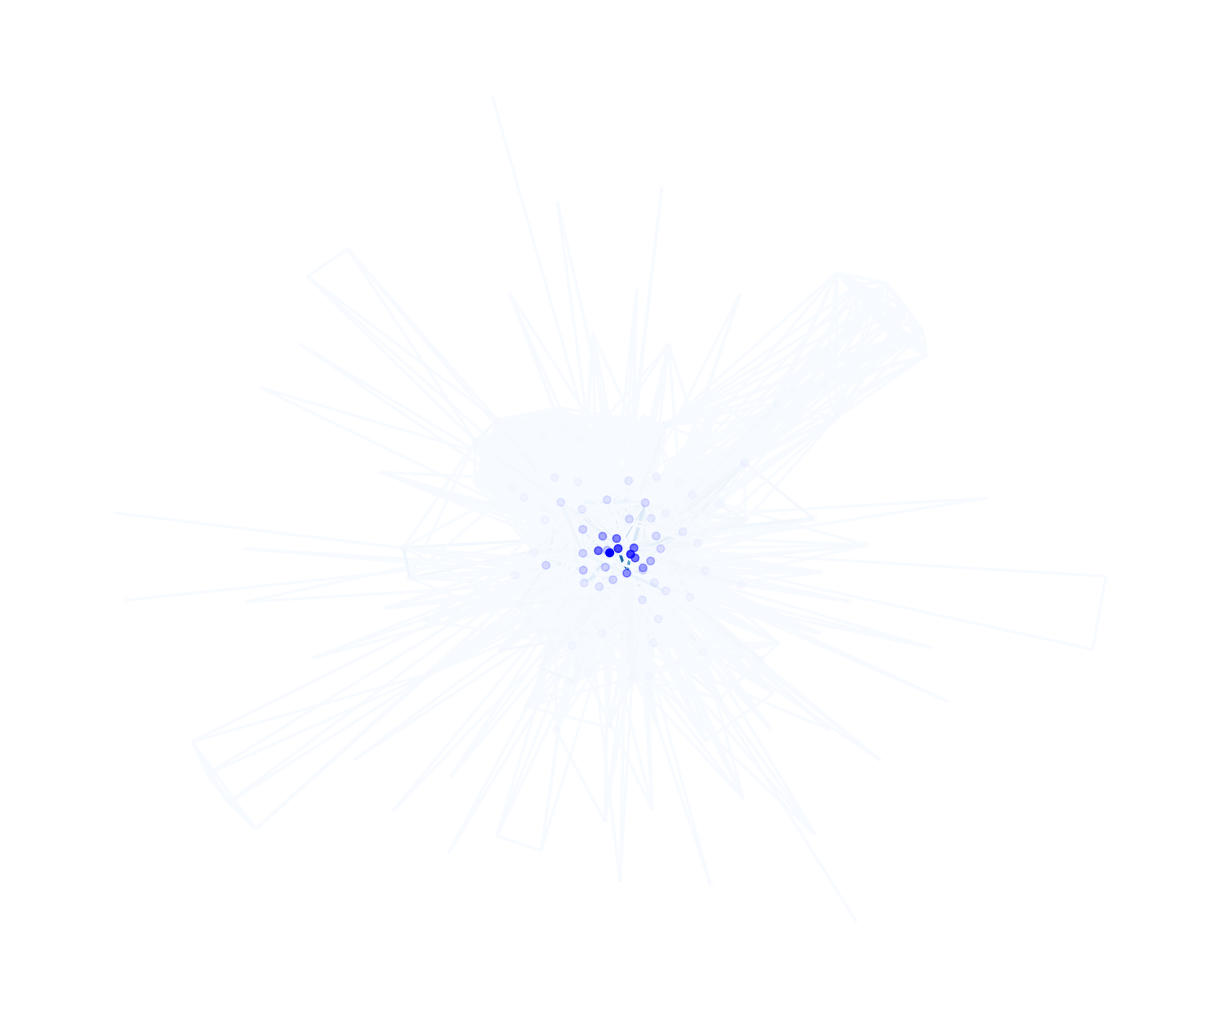

In [28]:
# Calculate the frequency of each drug's appearance in the rows
drug_frequencies = df['drug_list'].explode().value_counts()

# Normalize the frequencies for color intensity (between 0 and 1)
normalized_frequencies = drug_frequencies / drug_frequencies.max()

# Create a graph from the updated co-occurrence matrix
G = nx.Graph()
for drug in cooccurrence_matrix.columns:
    G.add_node(drug, frequency=normalized_frequencies[drug])

for drug1, drug2 in combinations(cooccurrence_matrix.columns, 2):
    weight = cooccurrence_matrix.at[drug1, drug2]
    if weight > 0:
        G.add_edge(drug1, drug2, weight=weight)

# Draw the updated graph with a spring layout and transparency based on frequency
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, weight='weight', seed=42)  # Positions nodes using a force-directed algorithm
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Set a fixed color (blue) and adjust alpha based on frequency
fixed_color = (0, 0, 1, 1)  # Blue color with full alpha
node_colors = [(fixed_color[0], fixed_color[1], fixed_color[2], G.nodes[node]['frequency']) for node in G.nodes]

nx.draw(G, pos, with_labels=False, node_size=30, node_color=node_colors, font_size=15, font_color="black", edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
#plt.title('Drug Co-occurrence Network Graph (Updated with Alpha Based on Frequency)')
plt.savefig('drug_network_unlabelled_weighted.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

The graph is slightly different each time, so I think creating an animation is the best way to do this.

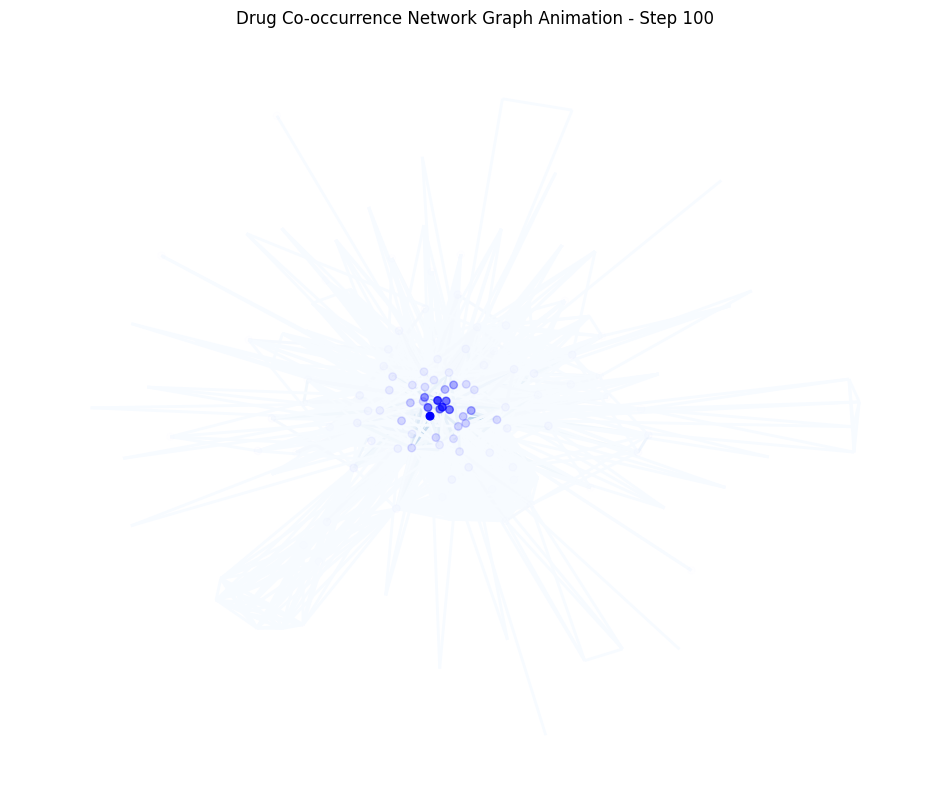

In [59]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import combinations
import numpy as np

# Function to create a co-occurrence matrix
def create_cooccurrence_matrix(df, drug_col):
    # Get the list of all unique drugs
    all_drugs = set(sum(df[drug_col], []))
    drug_list = sorted(list(all_drugs))

    # Initialize a co-occurrence matrix
    cooccurrence_matrix = pd.DataFrame(0, index=drug_list, columns=drug_list, dtype=int)

    # Count co-occurrences
    for drugs in df[drug_col]:
        for drug1, drug2 in combinations(drugs, 2):
            cooccurrence_matrix.at[drug1, drug2] += 1
            cooccurrence_matrix.at[drug2, drug1] += 1

    return cooccurrence_matrix

# Create the co-occurrence matrix
cooccurrence_matrix = create_cooccurrence_matrix(df, 'drug_list')

# List of medications to drop
medications_to_drop = ['Aspirin', 'Chlorpromazine', 'Esketamine']

# Remove the specified medications from the co-occurrence matrix
cooccurrence_matrix.drop(index=medications_to_drop, columns=medications_to_drop, inplace=True)

# Calculate the frequency of each drug's appearance in the rows
drug_frequencies = df['drug_list'].explode().value_counts()

# Normalize the frequencies for alpha intensity (between 0 and 1)
normalized_frequencies = drug_frequencies / drug_frequencies.max()

# Create a graph from the updated co-occurrence matrix
G = nx.Graph()
for drug in cooccurrence_matrix.columns:
    G.add_node(drug, frequency=normalized_frequencies.get(drug, 0))

for drug1, drug2 in combinations(cooccurrence_matrix.columns, 2):
    weight = cooccurrence_matrix.at[drug1, drug2]
    if weight > 0:
        G.add_edge(drug1, drug2, weight=weight)

# Draw the initial graph with all nodes having the same color
pos = nx.spring_layout(G, weight='weight')  # Positions nodes using a force-directed algorithm
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

# Initialize the node colors (all blue with full opacity)
initial_color = (0, 0, 1, 1)  # Blue color with full alpha
node_colors = {node: initial_color for node in G.nodes}

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title('Drug Co-occurrence Network Graph')

# Function to update the colors
def update_colors(alpha_progress):
    current_colors = []
    for node in G.nodes:
        freq = G.nodes[node]['frequency']
        alpha = (1 - alpha_progress) + alpha_progress * freq
        current_colors.append((0, 0, 1, alpha))
    return current_colors

# Animation function
def update(num):
    current_alpha = num / 100
    current_colors = update_colors(current_alpha)
    ax.clear()
    nx.draw(G, pos, with_labels=False, node_size=30, node_color=current_colors, font_size=15, font_color="black", edge_color=weights, edge_cmap=plt.cm.Blues, width=2)
    ax.set_title(f'Drug Co-occurrence Network Graph Animation - Step {num}')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=101, interval=100, repeat=False)

# Save the animation as a gif file
ani.save('drug_cooccurrence_animation.gif', writer='pillow', fps=10)

plt.show()


The most frequently discussed medication is: Lamotrigine


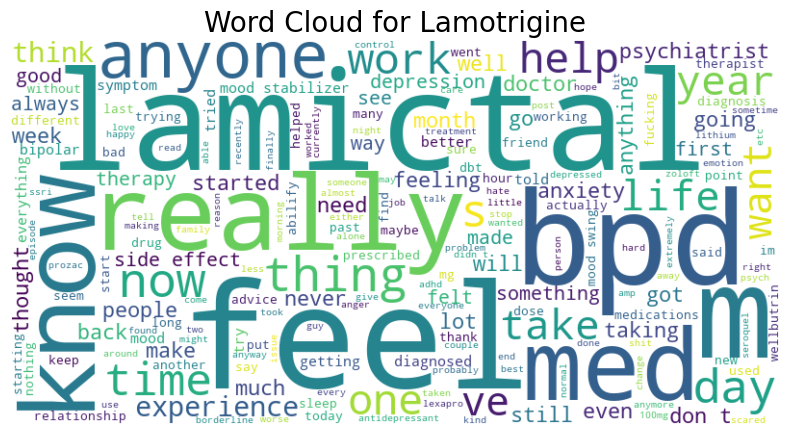

In [61]:
from wordcloud import WordCloud, STOPWORDS



# Find the most frequently discussed medication
drug_frequencies = df['drug_list'].explode().value_counts()
most_frequent_medication = drug_frequencies.idxmax()

print(f"The most frequently discussed medication is: {most_frequent_medication}")

# Filter rows containing the most frequently discussed medication
filtered_df = df[df['drug_list'].apply(lambda x: most_frequent_medication in x)]

# Combine the 'combined_text' of those rows
combined_text = " ".join(filtered_df['combined_text'])

# Define additional stopwords if needed
stopwords = set(STOPWORDS)
additional_stopwords = {"medication", "passage","lamotrigine"}  # Add custom stopwords here
stopwords.update(additional_stopwords)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for {most_frequent_medication}", fontsize=20)
plt.show()


In [17]:
# Explode the lists in 'drug_list' into separate rows and count the occurrences of each medication
drug_frequencies = df['drug_list'].explode().value_counts()

# Get the top 20 most frequent medications
top_20_medications = drug_frequencies.head(20)

# Print the top 20 most frequently discussed medications
print("The top 20 most frequently discussed medications are:")
print(top_20_medications)

The top 20 most frequently discussed medications are:
drug_list
Lamotrigine         552
Sertraline          406
Quetiapine          396
Fluoxetine          297
Bupropion           291
Escitalopram        284
Aripiprazole        257
Venlafaxine         224
Amphetamine         173
Alprazolam          171
Clonazepam          137
Citalopram          100
Duloxetine           98
Diazepam             91
Topiramate           81
Lorazepam            79
Olanzapine           76
Lisdexamfetamine     70
Lurasidone           67
Risperidone          66
Name: count, dtype: int64


#### OpenAI sentiment analysis

We can also run sentiment analysis. Let's first figure out how large things are if we try to run sentiment analysis for Lamotrigine. Basically, this tells us how expensive it will be.

In [12]:
import tiktoken

combined_text = ' '.join(df["combined_text"])

# Initialize the encoder
enc = tiktoken.encoding_for_model("gpt-3.5")

# Count the tokens
num_tokens = len(enc.encode(combined_text))
print(f"Number of tokens: {num_tokens}")

Number of tokens: 1072666


So it will be roughly 5 dollars to run this through the entire data set. Let's determine the rough cost for running it for 'Lamotrigine'

In [14]:
df_Lamotrigine=df[df['drug_list'].apply(lambda x: 'Lamotrigine' in x)]
combined_text_Lamotrigine = ' '.join(df_Lamotrigine["combined_text"])
num_tokens = len(enc.encode(combined_text_Lamotrigine))
print(f"Number of tokens: {num_tokens}")

Number of tokens: 178756


In [104]:
import openai
import os

# Set your OpenAI API key
api_key = 'YOUR_API_KEY_HERE'

# Check if the API key is available
if api_key is None:
    raise ValueError("API key is not set. Please set the OPENAI_API_KEY environment variable.")

openai.api_key = api_key

# Define a function to generate a response using GPT-3.5
def generate_response(prompt):
    try:
        response = openai.completions.create(
            model="gpt-3.5-turbo-instruct",  # Use appropriate engine
            prompt=prompt,
            max_tokens=150,
            n=1,
            stop=None,
            temperature=0.3,
        )
        return response.choices[0].text.strip()
    except Exception as e:
        print(f"Error generating response: {e}")
        return None

if __name__ == "__main__":
    # Example prompt
    prompt = "Tell me a joke."

    # Generate and print the response
    response = generate_response(prompt)
    if response:
        print("Generated Response:\n", response)
    else:
        print("Failed to generate response.")


Generated Response:
 Why was the math book sad?

Because it had too many problems.


In [163]:
# I need this snippet to determine how many tokens to use
# Initialize the tokenizer for GPT-3.5
enc = tiktoken.get_encoding("gpt2")

# Calculate the number of tokens in each 'combined_text'
df['token_count'] = df['combined_text'].apply(lambda text: len(enc.encode(text)))

# Find the index of the row with the greatest number of tokens
max_tokens = df['token_count'].max()

In [115]:
print(max_tokens)

7988


In [124]:
prompt_length_test = """The passage enclosed by `` `` contains some discussion about the medication {medication_name} "
          (perhaps referring to it with a synonym from the list '{synonym_list_string(medication_name)}'). "
          The response should only consider this medication and none others. Please format the output as a "
          dictionary with the following keys, 'sentiment', 'reason'. For 'sentiment,' respond with '1' if the "
          medication helped to treat the poster, even if there are minor side effects or the medication did not "
          fully resolve the condition. Respond with '-1' if the medication did not help the poster. Respond with "
          '0' if the discussion of the medication is neutral and respond with '-' if there is not enough information "
            to determine this information. 'Reason' should be a short sentence about the experience the poster had with "
          the medication, including effectiveness, side effects, interactions with other medications, or addictions: """

In [125]:
len(enc.encode(prompt_length_test))

279

If I want to run GPT 3.5 instinct, I only have 4096 tokens available per request. If the prompt is roughly 279 (a bit longer with the synonyms) and I want to save 300 for the response, I have 4096-600 remaining. Let's round this to 3500.

Later edit: The counts somewhat disagree, so I had to cut this down further

In [153]:
# Filter rows where the number of tokens exceeds 2900
high_token_rows = df[df['token_count'] > 2900]

print("Rows where the number of tokens exceeds 2900:")
high_token_rows.info()

Rows where the number of tokens exceeds 2900:
<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 45 to 2382
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  22 non-null     object 
 1   selftext               22 non-null     object 
 2   created_utc            22 non-null     int64  
 3   over_18                22 non-null     bool   
 4   subreddit              22 non-null     object 
 5   date_created           22 non-null     object 
 6   combined_text          22 non-null     object 
 7   processed_text         22 non-null     object 
 8   relevance_probability  22 non-null     float64
 9   drug_list              22 non-null     object 
 10  text_length            22 non-null     int64  
 11  token_count            22 non-null     int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 2.1+ KB


Fortunately, there are only 18 rows where this is an issue. We can manually code these.

In [195]:
# Function to get sentiment and reason for a given medication from text
def get_medication_sentiment(medication_name, text):
    # Initialize the tokenizer for GPT-3.5 using gpt2 encoding
    enc = tiktoken.get_encoding("gpt2")
    
    # Calculate the number of tokens
    token_count = len(enc.encode(text))
    
    # Check if the number of tokens exceeds 2900
    if token_count > 2900:
        return {'sentiment': 'unknown', 'reason': 'Text too long to analyze'} 

    #Create the prompt string
    prompt = (f"The passage enclosed by `` `` contains some discussion about the medication {medication_name} "
          f"(perhaps referring to it with a synonym from the list '{synonym_list_string(medication_name)}'). "
          f"The text must be taken as is and cannot be used to further a conversation. "
          f"The response should only consider this medication and none others. Please format the output as a "
          f"dictionary with the following keys, 'sentiment', 'reason'. For 'sentiment,' respond with '1' if the "
          f"poster took the medication and it helped their condition, even if there are minor side effects or the medication did not "
          f"fully resolve the symptoms. Respond with '-1' if the medication did not help the poster or if there were major adverse affects. Respond with "
          f"'0' if the discussion of the medication is neutral and respond with '-' if there is not enough information "
          f"to make a conclusion or if the poster has not yet taken the medication. 'Reason' should be a short string (approximately one sentence) about the experience the poster had with "
          f"the medication, including effectiveness, side effects, interactions with other medications, or addictions: "
          f"``{text}``")  
    response = openai.completions.create(
    model="gpt-4o",
    prompt=prompt,
    max_tokens=300,
    temperature=0.1,
        stop=None
    )
    return response 


In [175]:
# Function to analyze sentiment for a specified medication
def analyze_medication_sentiment(df, medication_name):
    # Apply the get_medication_sentiment function to each row in the DataFrame
    df[f'reponse_{medication_name}'] = df['combined_text'].apply(lambda text: get_medication_sentiment(text, medication_name))
    return df

# Function to provide breakdown of sentiment for a medication
def sentiment_breakdown(df, sentiment_col_name):
    numeric_sentiments = df[sentiment_col_name].loc[df[sentiment_col_name].astype(str).str.isnumeric()].astype(int)
    sentiment_counts = numeric_sentiments.value_counts()
    total = len(df)  # Total number of sentiments, including non-numeric
    breakdown = {}
    for sentiment, count in sentiment_counts.items():
        percentage = (count / total) * 100
        breakdown[str(sentiment)] = {'count': count, 'percentage': percentage}
    
    non_numeric_sentiments = df[sentiment_col_name].loc[~df[sentiment_col_name].astype(str).str.isnumeric()]
    for sentiment in non_numeric_sentiments.unique():
        count = non_numeric_sentiments.eq(sentiment).sum()
        percentage = (count / total) * 100
        breakdown[sentiment] = {'count': count, 'percentage': percentage}
    
    return breakdown

# Function to plot histogram of sentiment counts
def plot_sentiment_histogram(df, sentiment_col_name):
    sentiment_counts = df[sentiment_col_name].value_counts()
    plt.bar(sentiment_counts.index.astype(str), sentiment_counts.values)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Histogram of Sentiment Counts')
    plt.show()


The dictionary isn't being created correctly, so I'm going back into GPT to see if I can figure out what it's doing

In [187]:
text = """Was recommended Radically Open Dialectical Behavior Therapy (RO-DBT) - My entire perception of my psych problems has shifted. hello everyone. little background, i'm diagnosed bipolar (personally disagree despite 3 diagnoses) &amp; have considerably severe treatment resistant depression. i also have complex ptsd and a lot of borderline traits. i've been through about 4 different therapists, completed individual dbt, and am currently in a dbt skills group. i take 300mg wellbutrin for depression and 100mg lamictal as a mood stabilizer. i no longer feel as though i am taking any medication, and i don't get out of bed until i have to go to work. my suicidal ideation is worse than ever; it seems i think about killing myself almost every 3 hours. i'm having trouble showering consistently and have disconnected from most of my friends. i torment my boyfriend almost daily despite the dbt and my seemingly constant consumption of buddhist/shambhalic texts.


needless to say, i'm afraid i'm running out of options.


i started seeing a new therapist at my dbt center this week who is trained in radically open dbt, or ro-dbt. ro-dbt has essentially the opposite goal of standard dbt, in that it encourages open emotional expression as opposed to emotion regulation, and is for "overcontrolled" people (cluster c - avoidant, ocd) instead of "undercontrolled" (b - bpd, narcissistic, etc.). because i have extreme bouts of anger to the point of screaming and breaking things, it's pretty needless to say that i've never considered this kind of therapy.


initially they thought that prolonged exposure therapy for trauma would be best, as i felt my reactions to my environment stemmed from my childhood trauma (neglect, addict parents, etc.). however, during my first session, the therapist was extremely interested in what my reactions were in response to rather than the reactions themselves. she asked me about how i can't focus when the dog makes mouth sounds, how i can't let it go if my boyfriend leaves his guitars in the center of the room, and how i can't get anything accomplished because i get so distracted by details - i.e. going to take a shower and spending 20 minutes making a "shower playlist" to hear the perfect songs. 


hello everyone. little background, i'm diagnosed with bipolar 2 (personally disagree that i have bipolar at all despite 3 diagnoses) &amp; have considerably severe treatment resistant depression. i also have complex ptsd and a lot of borderline traits. i've been through about 4 different therapists, completed individual dbt, and am currently in a dbt skills group. i take 300mg wellbutrin for depression and 100mg lamictal as a mood stabilizer. i no longer feel as though i am taking any medication, and i don't get out of bed until i have to go to work. my suicidal ideation is worse than ever; it seems i think about killing myself almost every 3 hours. i'm having trouble showering consistently and have disconnected from most of my friends. i torment my boyfriend almost daily despite the dbt and my seemingly constant consumption of buddhist/shambhalic texts.


needless to say, i'm afraid i'm running out of options.


this week i started seeing a new therapist at my dbt center who is trained in radically open dbt, or ro-dbt. ro-dbt has essentially the opposite goal of standard dbt, in that its emphasis is on encouraging open emotional expression as opposed to emotion regulation, and is for "overcontrolled" people (cluster c - avoidant, ocd) instead of "undercontrolled" (b - bpd, narcissistic, etc.). because i have extreme bouts of anger to the point of screaming and breaking things, it's pretty needless to say that i've never considered this kind of therapy.


initially they thought that prolonged exposure therapy for trauma would be best, as i felt my reactions to my environment stemmed from my childhood trauma (neglect, addict parents, etc.). however, during my first session, the therapist was extremely interested in what my reactions were in response to rather than the reactions themselves. she asked me about how i can't focus when the dog makes mouth sounds, how i can't let it go if my boyfriend leaves his guitars in the center of the room, and how i can't get anything accomplished because i get so distracted by details - i.e. going to take a shower and spending 20 minutes making a "shower playlist" to hear the perfect songs. she was especially interested in the fact that none of my friends seem to believe i have mental health problems, because aside from lapses in my social involvement, i seem fine when i’m actually around everyone, despite my many explanations and admissions of my struggles at home. i only explode around my boyfriend, never at work, never at school, never with anyone other than him and every other boyfriend. i considered this a borderline trait, but she seemed extremely surprised that i can go from a huge fight, screaming and crying, then appear at work 15 minutes later and be able to chit chat with co-workers, despite secretly wanting to die. this is generally my life, i feel very uncomfortable and different, but i’m good at being funny, talking expressively, and making self-deprecating jokes.


i know i'm uptight and can be a perfectionist, however, i haven't completed my ba because i keep dropping out (due to depression), i do and have done a lot of drugs, i drink a lot, am and have always been promiscuous and generally impulsive. perfectionists are successful, right? i'm a broke waitress. i can't even get out of bed. i give up on everything i begin. i'm also a compulsive oversharer, it's a joke among my co-workers and people that know me that i would read everyone my diary if i had the chance. i connect with people all the time. 


then the therapist asked me, “how do you feel when you’re telling people these personal things? do you feel closer to them? do you feel connected to them?” 
i realized i don’t. 


i still feel very far away from people despite my frantic attempts at intimacy. i tell them all about myself but i’ll laugh or smile when talking about childhood trauma or sexual assault. she explained that you can share without connecting, especially when your emotional expression doesn’t fit the words. i’m saying vulnerable things because i’m terrified of actually being vulnerable. this is why i drink so much socially, and why i will do drugs socially. which even so, i’ve been told i’m a reserved drunk, and that i’m a serious person albeit a very funny one. i am constantly aware of my appearance and generally find myself unattractive despite being told i’m beautiful and getting considerable attention for my appearance throughout my adult life. i’ve had an on-again-off-again eating disorder for over 10 years and a relentless preoccupation with my weight despite being .1 above the underweight bmi. i won’t try new things around people, i never feel like i let loose. if one thing goes wrong i abandon a project. i was once asked to do vocals for a band and had to drink vodka beforehand and would still be singing too quietly, i was terrified and frozen. i refuse to practice anything around anyone.



she suggested that my depression and mood disorder could possibly stem from being overly controlled, that because i can’t let loose and i feel like things absolutely have to be a certain way, i paralyze myself and can’t progress. she suggested that this is why i haven’t pursued a career and why i have never shared my creative writing. on a lighter note, that this is why i refuse to do karaoke. 


she also suggested that the reason i explode on my boyfriend, and those in the past, is because they are the ones to actually see me vulnerable. i no longer have total control over my living environment. he see me in my pajamas on the couch at noon. he sees me sleep past 1. i can’t posture myself around him. so i am scared and i resent him. he’s going to leave me because he knows what i’m actually like. 


i spent the rest of the day in shock. i’m still processing it, which is partially why i wrote this. i’m starting ro-dbt next week. 



**has anyone here done ro-dbt before?** what can i expect?"""

In [196]:
prompt_test = (f"The passage enclosed by `` `` contains some discussion about the medication {medication_name} "
          f"(perhaps referring to it with a synonym from the list '{synonym_list_string(medication_name)}'). "
          f"The text must be taken as is and cannot be used to further a conversation. "
          f"The response should only consider this medication and none others. Please format the output as a "
          f"dictionary with the following keys, 'sentiment', 'reason'. For 'sentiment,' respond with '1' if the "
          f"poster took the medication and it helped their condition, even if there are minor side effects or the medication did not "
          f"fully resolve the symptoms. Respond with '-1' if the medication did not help the poster or if there were major adverse effects. Respond with "
          f"'0' if the discussion of the medication is neutral and respond with '-' if there is not enough information or if the poster has not taken the medication"
          f"to make a conclusion. 'Reason' should be a short string (approximately one sentence) about the experience the poster had with "
          f"the medication, including effectiveness, side effects, interactions with other medications, or addictions: "
          f"``{text}``") 

In [193]:
prompt_test

'The passage enclosed by `` `` contains some discussion about the medication Lamotrigine (perhaps referring to it with a synonym from the list \'\'Lamotrigina\', \'Labileno\', \'Lamotriginum\', \'Lamiktal\', \'Lamotrigine\', \'Lamictal\', \'Crisomet\'\'). The text must be taken as is and cannot be used to further a conversation. The response should only consider this medication and none others. Please format the output as a dictionary with the following keys, \'sentiment\', \'reason\'. For \'sentiment,\' respond with \'1\' if the poster took the medication and it helped their condition, even if there are minor side effects or the medication did not fully resolve the symptoms. Respond with \'-1\' if the medication did not help the poster or if there were major adverse effects. Respond with \'0\' if the discussion of the medication is neutral and respond with \'-\' if there is not enough information to make a conclusion. \'Reason\' should be a short string (approximately one sentence) ab

In [198]:
response = openai.chat.completions.create(
    model="gpt-4o",
    messages=[{'role': "user", 'content':prompt_test}],
    max_tokens=300,
    temperature=0.1,
        stop=None
    )



TypeError: 'ChatCompletionMessage' object is not subscriptable

In [ ]:
response = ChatCompletion(id='chatcmpl-9UZ3Z6VkCfrhmfiH3s1fy2nnBb8pq', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```json\n{\n  "sentiment": "-1",\n  "reason": "The poster reports that Lamictal did not help their condition and mentions worsening suicidal ideation and other severe symptoms."\n}\n```', role='assistant', function_call=None, tool_calls=None))], created=1717071625, model='gpt-4o-2024-05-13', object='chat.completion', system_fingerprint='fp_43dfabdef1', usage=CompletionUsage(completion_tokens=42, prompt_tokens=1979, total_tokens=2021))

ChatCompletion(id='chatcmpl-9UZ3Z6VkCfrhmfiH3s1fy2nnBb8pq', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='```json\n{\n  "sentiment": "-1",\n  "reason": "The poster reports that Lamictal did not help their condition and mentions worsening suicidal ideation and other severe symptoms."\n}\n```', role='assistant', function_call=None, tool_calls=None))], created=1717071625, model='gpt-4o-2024-05-13', object='chat.completion', system_fingerprint='fp_43dfabdef1', usage=CompletionUsage(completion_tokens=42, prompt_tokens=1979, total_tokens=2021))

In [177]:
#I'm running into issues, so I'm going to batch things to see what happens

df_Lamotrigine=df[df['drug_list'].apply(lambda x: 'Lamotrigine' in x)]

In [179]:
df_Lamotrigine_20=df_Lamotrigine.head(20)

In [180]:
# Running ChatGPT on the posts
#### WARNING: DO NOT RUN THIS MULTIPLE TIMES. IT COSTS MONEY TO RUN


medication_name = 'Lamotrigine'
# Using the evaluation function for sentiment
results_df = analyze_medication_sentiment(df_Lamotrigine_20, medication_name)

results_df.to_csv('../data/Lamotrigine_sentiments.csv', index=False)

/var/folders/9j/j4gyltgs6txd83bg66_mv4fn664jzt/T/ipykernel_2826/1066737724.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'reponse_{medication_name}'] = df['combined_text'].apply(lambda text: get_medication_sentiment(text, medication_name))


In [182]:
results_df.head(20)

,title,selftext,created_utc,over_18,subreddit,date_created,combined_text,processed_text,relevance_probability,drug_list,text_length,token_count,reponse_Lamotrigine
0,"Informal survey: What (legal) drugs, if any, '...","hi! so i'm officially diagnosed, tried dbt but...",1602953594,False,BPD,2020-10-17 16:53:14,"Informal survey: What (legal) drugs, if any, '...",informal survey legal drug worked hi im offici...,1.000000,"[Alprazolam, Amitriptyline, Aripiprazole, Cita...",2517,769,Completion(id='cmpl-9UUNexBiXzZtxiBAGF9VXACnEN...
3,My experience with lamictal/lamotrigine,this is going to be a very long post because i...,1628777635,False,BPD,2021-08-12 14:13:55,My experience with lamictal/lamotrigine this i...,experience lamictallamotrigine going long post...,1.000000,"[Alprazolam, Bupropion, Buspirone, Clonazepam,...",6104,1330,Completion(id='cmpl-9UUNff5ed9EwaozrCR4DbNIMSh...
8,What medication(s) work best for when you have...,i am formally diagnosed with severe general an...,1618869415,False,BPD,2021-04-19 21:56:55,What medication(s) work best for when you have...,medication work best several mental illness in...,0.999999,"[Amphetamine, Aripiprazole, Bupropion, Citalop...",1622,425,Completion(id='cmpl-9UUNgzPqAyzEpOO7G6D0PYKEGV...
12,My first time Inpatient: how I learned to advo...,"hi everyone, i just got released from the hosp...",1594470067,False,BPD,2020-07-11 12:21:07,My first time Inpatient: how I learned to advo...,first time inpatient learned advocate hi every...,0.999997,"[Fluoxetine, Lamotrigine]",3061,693,Completion(id='cmpl-9UUNhl6RH1O5b8kXjHtKodubao...
14,Tomorrow I am seeing my doctor pertaining to m...,"okay, i just need to get this out. \n\nso afte...",1451986895,False,BPD,2016-01-05 09:41:35,Tomorrow I am seeing my doctor pertaining to m...,tomorrow seeing doctor pertaining medication i...,0.999996,"[Aripiprazole, Lamotrigine, Topiramate]",3434,769,Completion(id='cmpl-9UUNi52cZR0jKpnkA3gVCMFJM3...
16,I’m so sick of medication!,i can’t fucking do this shit anymore with thes...,1606445501,False,BPD,2020-11-27 02:51:41,I’m so sick of medication! i can’t fucking do ...,i’m sick medication can’t fucking shit anymore...,0.999996,"[Aripiprazole, Bupropion, Citalopram, Fluoxeti...",1678,470,Completion(id='cmpl-9UUNjYvIDvsOZZx4zG5IqOKmSA...
17,Effexor and Trazodone?,"i was diagnosed with bpd about two years ago, ...",1504706910,False,BPD,2017-09-06 14:08:30,Effexor and Trazodone? i was diagnosed with bp...,effexor trazodone diagnosed bpd two year ago i...,0.999996,"[Amphetamine, Bupropion, Fluoxetine, Lamotrigi...",961,245,Completion(id='cmpl-9UUNk62Cfxx9p58CMrBWlFwsv7...
18,Lamictal (Lamotrigine) + What Combination?,"okay, right now i am currently on 200mg lamotr...",1493723590,False,BPD,2017-05-02 11:13:10,Lamictal (Lamotrigine) + What Combination? oka...,lamictal lamotrigine combination okay right cu...,0.999996,"[Aripiprazole, Lamotrigine, Promethazine]",1975,481,Completion(id='cmpl-9UUNlQ7qiDIWsTSRTQ54j4uyfh...
19,"I am intolerant to most medications, how do I ...",i'd like to start off by saying i know medicat...,1596208406,False,BPD,2020-07-31 15:13:26,"I am intolerant to most medications, how do I ...",intolerant medication cope id like start sayin...,0.999994,"[Aripiprazole, Bupropion, Fluoxetine, Lamotrig...",1692,422,Completion(id='cmpl-9UUNm40XsznsnG30yMdxBotw66...
22,New medication increase and addition,"hey guys,\n\nlittle bit of a back story for co...",1630624145,False,BPD,2021-09-02 23:09:05,"New medication increase and addition hey guys,...",new medication increase addition hey guy littl...,0.999990,"[Aripiprazole, Diazepam, Lamotrigine, Quetiapi...",1112,286,Completion(id='cmpl-9UUNnqZ4LRo1p2pG0zoEC6k3mW...


Reading through the document that we created, unfortunately this didn't do a very good job of sentiment analysis. It assumed that all the poster's had taken the drug, and tended to be too optimistic about its effect. Perhaps some better prompt engineering would help here.

It looks like I need to switch to a better (i.e., more expensive model.) I'll do that with batches.